In [ ]:
%pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="e4grwwYQzStEU9h0q5k5") # put your api key
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")
# rf = Roboflow(api_key="e4grwwYQzStEU9h0q5k5")
# project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
# version = project.version(8)
# dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 2834.67it/s]


In [ ]:
import cv2
import random
import glob
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [ ]:
# Define class names and colors
class_names = ['tumor']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

# Function to plot segmentation masks on the image
def plot_segmentation(image, polygons, labels):
    h, w, _ = image.shape

    for polygon_num, polygon in enumerate(polygons):
        class_name = class_names[int(labels[polygon_num])]
        color = colors[class_names.index(class_name)]

        # Denormalize the polygon points
        points = []
        for i in range(0, len(polygon), 2):
            x = int(float(polygon[i]) * w)
            y = int(float(polygon[i + 1]) * h)
            points.append([x, y])

        # Convert points to a NumPy array for OpenCV functions
        points = np.array(points, np.int32).reshape((-1, 1, 2))

        # Draw the segmentation mask
        cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
        cv2.fillPoly(image, [points], color=color)

        # Draw the class label
        centroid_x = int(np.mean(points[:, 0, 0]))
        centroid_y = int(np.mean(points[:, 0, 1]))
        font_scale = 0.5
        font_thickness = 1
        cv2.putText(image, class_name, (centroid_x, centroid_y - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return image

In [ ]:
# Function to plot images with segmentation masks
def plot(image_paths, label_paths, num_samples):
    all_images = sorted(glob.glob(image_paths))
    all_labels = sorted(glob.glob(label_paths))

    if not all_images or not all_labels:
        print("Error: No images or labels found. Check the paths.")
        return

    num_images = len(all_images)
    plt.figure(figsize=(15, 12))

    for i in range(num_samples):
        idx = random.randint(0, num_images - 1)
        image = cv2.imread(all_images[idx])

        if image is None:
            print(f"Error: Could not read image {all_images[idx]}")
            continue

        polygons = []
        labels = []

        with open(all_labels[idx], 'r') as f:
            for line in f.readlines():
                elements = line.split()
                label = int(elements[0])
                polygon_points = elements[1:]  # Extract the polygon points
                polygons.append(polygon_points)
                labels.append(label)

        result_image = plot_segmentation(image, polygons, labels)
        plt.subplot(2, 2, i + 1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

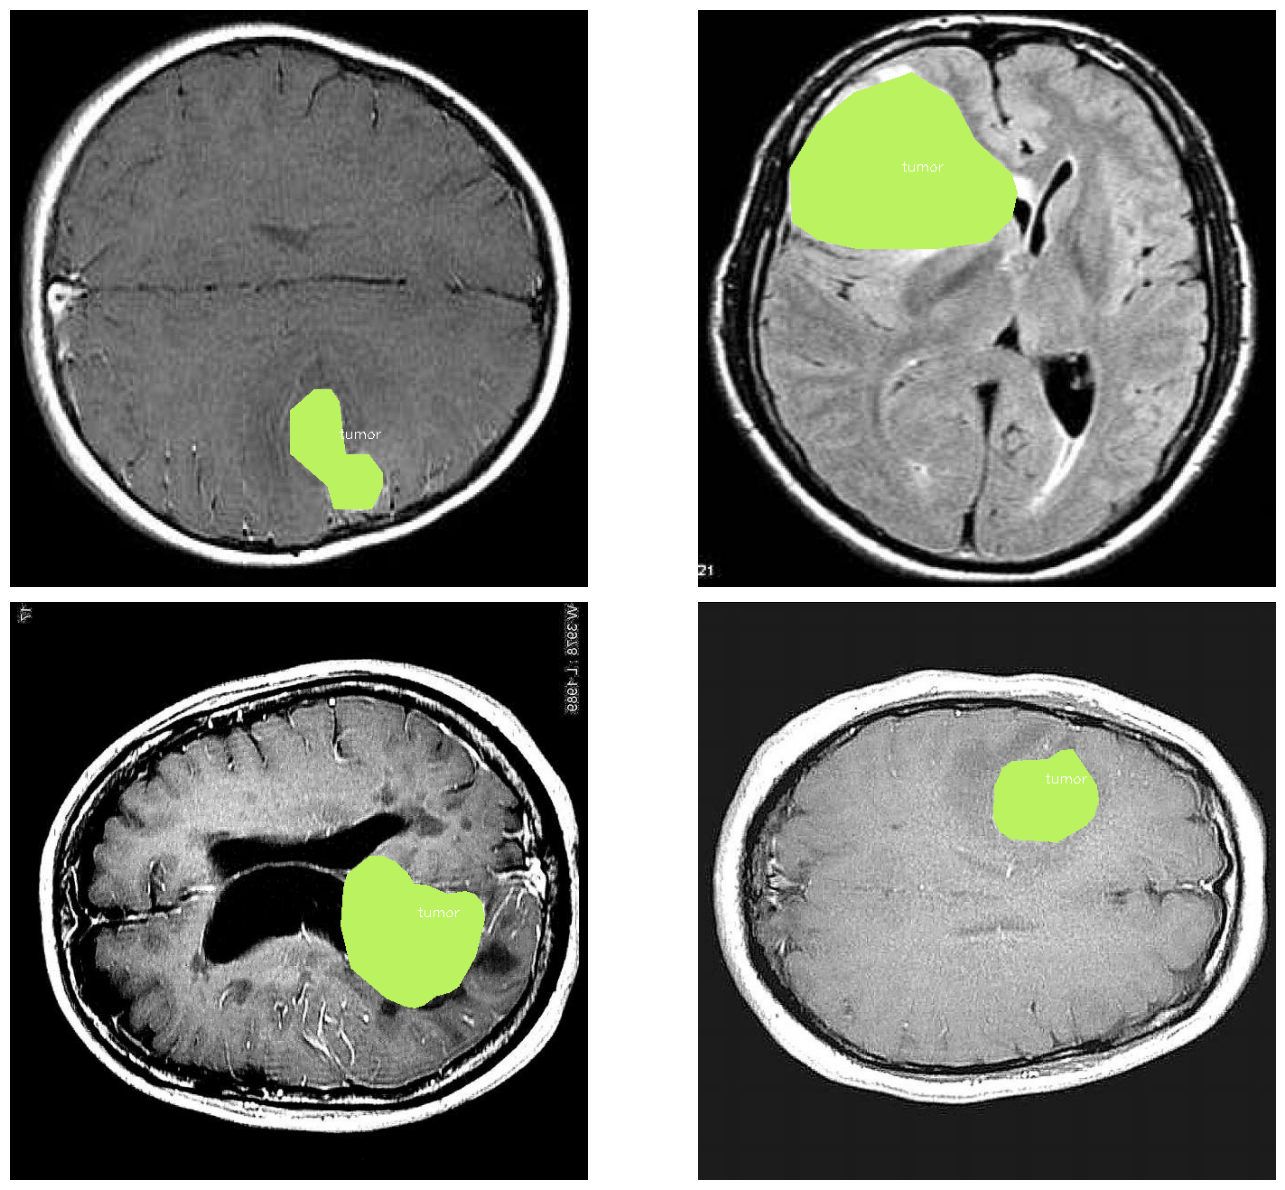

In [ ]:
# Example usage
plot(
    image_paths='/content/BRAIN-TUMOR-1/train/images/*',
    label_paths='/content/BRAIN-TUMOR-1/train/labels/*',
    num_samples=4
)

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo11n-seg.pt")
# Train the model
train_results = model.train(
    data="/content/BRAIN-TUMOR-1/data.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 103MB/s]


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/BRAIN-TUMOR-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.2MB/s]


AMP: checks passed ✅


train: Scanning /content/BRAIN-TUMOR-1/train/labels... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<00:00, 1693.69it/s]

train: New cache created: /content/BRAIN-TUMOR-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/BRAIN-TUMOR-1/valid/labels... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1600.26it/s]

val: New cache created: /content/BRAIN-TUMOR-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.05G      1.158       2.48      2.721      1.292          9        640: 100%|██████████| 37/37 [00:20<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        123        126    0.00501      0.968      0.668      0.401    0.00394      0.762      0.132     0.0537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.99G      1.168      1.988      1.811      1.233         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        123        126      0.634      0.563      0.638       0.38      0.511      0.429      0.402      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.04G      1.221      1.922       1.67      1.286         16        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        126      0.726      0.492       0.65      0.403      0.751      0.479      0.628      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.03G      1.185      1.909       1.55      1.273         10        640: 100%|██████████| 37/37 [00:14<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        123        126      0.697      0.794      0.792      0.452       0.69      0.786      0.762      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.98G      1.217      1.996      1.354      1.277         18        640: 100%|██████████| 37/37 [00:14<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        123        126      0.894      0.868      0.939      0.641      0.894      0.867      0.919       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.05G      1.138      1.849      1.203      1.225         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        126      0.529      0.603      0.571      0.363      0.556      0.587      0.543      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.96G      1.134      1.838      1.146      1.231         12        640: 100%|██████████| 37/37 [00:15<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        123        126      0.931      0.852      0.904      0.633      0.931      0.852        0.9      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.99G      1.093      1.768      1.056      1.228         14        640: 100%|██████████| 37/37 [00:15<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        126      0.916      0.861      0.927      0.659      0.916      0.861      0.928      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100         3G      1.063      1.683     0.9918      1.212         12        640: 100%|██████████| 37/37 [00:15<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        123        126      0.837      0.833      0.888      0.595      0.837      0.833      0.887      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.03G      1.077      1.707     0.9412      1.198         12        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        123        126       0.92      0.827      0.937       0.69       0.92      0.827      0.936       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.04G      1.044      1.682     0.9158        1.2         18        640: 100%|██████████| 37/37 [00:14<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        123        126      0.857      0.897      0.927      0.671      0.857      0.897      0.927      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.01G      1.056      1.719     0.9067      1.198         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        126      0.893      0.976      0.953      0.702      0.893      0.976      0.953      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.03G      1.012      1.635     0.8586       1.16         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        123        126      0.937      0.947      0.964      0.703      0.937      0.947      0.957      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.06G      1.004      1.652     0.8354      1.159         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        126      0.961      0.944      0.988      0.727      0.961      0.944      0.988      0.729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.04G      1.017       1.63     0.8217      1.188         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        123        126      0.893      0.841      0.934      0.652       0.91      0.857      0.947      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.04G     0.9698      1.589      0.781      1.145         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        123        126      0.943      0.976      0.982      0.743      0.942      0.976      0.984      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.98G      1.032      1.632     0.8153      1.184          8        640: 100%|██████████| 37/37 [00:14<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        123        126      0.949      0.883      0.962      0.631      0.949      0.883      0.962      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.01G      1.044      1.667     0.8292      1.189         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        123        126      0.936      0.944      0.977      0.723      0.936      0.944      0.977      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.97G     0.9736      1.527      0.771      1.143         12        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126       0.98      0.944      0.974      0.719       0.98      0.944      0.974      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.98G     0.9912      1.571     0.7842      1.146         19        640: 100%|██████████| 37/37 [00:14<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        126      0.891      0.929      0.955       0.71        0.9      0.937      0.967      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.04G      1.009      1.593     0.8042      1.161         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        126      0.785      0.651      0.724      0.509      0.797      0.659      0.727      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.01G     0.9981      1.636     0.8192      1.162         19        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        123        126      0.953      0.968      0.987      0.746      0.953      0.968      0.987      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.01G     0.9446      1.565     0.7501      1.133         12        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        123        126      0.967      0.927      0.979      0.735      0.967      0.927      0.979      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.03G     0.9448      1.484     0.7239      1.129         19        640: 100%|██████████| 37/37 [00:14<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        123        126      0.953      0.975      0.986      0.752      0.953      0.975      0.986      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.99G     0.9773      1.539      0.709      1.146         19        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        123        126      0.937      0.943      0.973       0.71      0.937      0.943      0.975      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.01G     0.9864      1.541     0.7274      1.151         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        123        126      0.923      0.947      0.975      0.721      0.923      0.947      0.975      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.03G     0.9443        1.5     0.7053       1.12         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        123        126      0.902      0.881       0.96       0.68      0.916      0.869      0.956      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.02G      0.952      1.448     0.6754      1.136         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.976       0.96      0.988      0.746      0.976       0.96      0.988       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.01G     0.9072      1.489     0.6513      1.108         19        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        123        126      0.953      0.929      0.965      0.728      0.953      0.929      0.965      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.95G     0.9148      1.458     0.6954      1.128          6        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        123        126      0.952      0.949       0.98      0.752      0.952      0.949       0.98      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.05G     0.8869      1.537     0.6757      1.101         14        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.964       0.96      0.981      0.742      0.964       0.96      0.983      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.99G     0.8844      1.496     0.6461      1.094         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.913      0.929      0.962      0.726      0.913      0.929      0.962      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.01G     0.8519      1.408      0.626      1.079         14        640: 100%|██████████| 37/37 [00:14<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        123        126      0.916      0.952      0.974      0.735      0.898       0.98      0.975      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.04G     0.8764      1.419     0.6282      1.102         19        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        123        126      0.984      0.979      0.993      0.758      0.984      0.979      0.993      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.97G     0.8741      1.502     0.6414       1.09         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.961      0.981      0.991      0.765      0.961      0.981      0.991      0.772



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.01G     0.8875      1.449     0.6115      1.101         14        640: 100%|██████████| 37/37 [00:14<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        123        126       0.97       0.96       0.99       0.76       0.97       0.96      0.983      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.97G     0.8667      1.405     0.6118      1.076         14        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        123        126      0.918      0.984      0.979      0.715      0.926      0.992       0.98      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.01G      0.913      1.415     0.6312      1.112         15        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        123        126      0.944      0.984      0.986      0.738      0.944      0.984      0.986      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.98G     0.8688      1.412     0.6147      1.082         14        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        123        126      0.969      0.983      0.989      0.769      0.969      0.983      0.989      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.03G      0.897      1.433     0.6362      1.101         12        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        123        126      0.969      0.987       0.99       0.78      0.969      0.987       0.99      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.97G      0.869      1.445      0.622      1.094         16        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        123        126      0.975      0.942      0.986      0.763      0.975      0.942      0.986      0.756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.98G     0.8526      1.408     0.6239      1.077         18        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        123        126      0.984      0.966      0.989      0.769      0.984      0.966      0.989      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.97G     0.8487      1.408     0.5979       1.09         16        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        123        126      0.919      0.987      0.975      0.757      0.919      0.987      0.975      0.754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.98G      0.846      1.366      0.613      1.072         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.968      0.968      0.981      0.744      0.968      0.968      0.981      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.95G     0.8157      1.321     0.5599      1.056         21        640: 100%|██████████| 37/37 [00:14<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        123        126      0.976      0.984      0.989      0.742      0.976      0.984      0.989      0.743



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.95G     0.8682      1.362      0.589      1.084         15        640: 100%|██████████| 37/37 [00:15<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126       0.98      0.944      0.985      0.739       0.98      0.944      0.985      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.97G     0.8833      1.398     0.6065      1.094         16        640: 100%|██████████| 37/37 [00:15<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        123        126      0.975      0.984      0.991      0.738      0.975      0.984      0.991      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.01G     0.8459      1.359     0.5767      1.084          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.953      0.956       0.97      0.733      0.968       0.97      0.984      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.02G     0.8198      1.336      0.572      1.067         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        123        126      0.975      0.984      0.993      0.766      0.975      0.984      0.993      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.95G     0.8308      1.362     0.5625      1.067         15        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        123        126      0.973      0.984      0.984      0.775      0.973      0.984      0.984      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100         3G     0.8221      1.319     0.5591       1.06          8        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        123        126      0.945      0.984      0.987      0.757      0.945      0.984      0.987      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.01G     0.7933      1.307     0.5425       1.05         11        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        123        126      0.946      0.967      0.983      0.753      0.946      0.967      0.983      0.753



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.98G     0.7913      1.301      0.533      1.039         16        640: 100%|██████████| 37/37 [00:14<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.968       0.96      0.986      0.772      0.966      0.976      0.986      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.97G      0.819      1.308     0.5462      1.071          9        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        123        126      0.954       0.99      0.978      0.761      0.954       0.99      0.978      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.01G     0.7841      1.251     0.5329      1.044         13        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        123        126      0.967      0.984      0.984      0.767      0.967      0.984      0.984      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.97G     0.8009      1.366     0.5708      1.051         16        640: 100%|██████████| 37/37 [00:15<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        123        126      0.988      0.968       0.99      0.779      0.988      0.968       0.99      0.772



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.01G     0.7754      1.258      0.528      1.048          9        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.992      0.983      0.993      0.785      0.992      0.983      0.993       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.01G     0.7779      1.276     0.5463      1.049         21        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        123        126      0.975      0.992      0.994      0.779      0.975      0.992      0.994      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.97G     0.7622      1.273     0.5213       1.04         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        123        126      0.984      0.991       0.99      0.767      0.984      0.991       0.99      0.764



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.99G     0.8056      1.317     0.5531      1.055         18        640: 100%|██████████| 37/37 [00:14<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        123        126      0.922      0.984      0.988      0.742      0.968      0.947       0.99      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.98G     0.7828      1.284     0.5001      1.042         12        640: 100%|██████████| 37/37 [00:14<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        123        126      0.984      0.981      0.994      0.778      0.984      0.981      0.994      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.99G     0.7935      1.271     0.5331      1.056         14        640: 100%|██████████| 37/37 [00:15<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        123        126      0.974      0.992      0.992      0.798      0.974      0.992      0.992      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.95G     0.7665      1.259     0.5108      1.037         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        123        126      0.992      0.989      0.991       0.78      0.992      0.989      0.991      0.778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.03G     0.7766      1.227     0.5167      1.048         15        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        123        126       0.99      0.992       0.99      0.792       0.99      0.992       0.99      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.95G     0.7274      1.221     0.4883      1.009         18        640: 100%|██████████| 37/37 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        123        126      0.992      0.974      0.991       0.79      0.992      0.974      0.991      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.01G     0.7597       1.24     0.4995      1.028         15        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        123        126      0.984      0.975       0.99      0.779      0.984      0.975      0.991      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.99G     0.7632      1.252     0.4934      1.029         14        640: 100%|██████████| 37/37 [00:15<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        123        126      0.974      0.992      0.992      0.792      0.974      0.992      0.992      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.01G     0.7715      1.263        0.5      1.055         15        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        123        126      0.991      0.992      0.991      0.793      0.991      0.992      0.991      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.97G     0.7296      1.183     0.4671      1.019         12        640: 100%|██████████| 37/37 [00:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        123        126      0.969      0.981      0.989      0.792      0.975      0.984      0.989      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.97G     0.7354      1.251     0.4908      1.024         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        123        126      0.977      0.991      0.993      0.785      0.977      0.991      0.993      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100         3G     0.7287      1.207     0.4667      1.021         15        640: 100%|██████████| 37/37 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.982      0.984      0.993      0.799      0.982      0.984      0.993      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.01G     0.7304       1.19      0.485      1.016         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        123        126      0.974      0.984      0.993      0.785      0.974      0.984      0.993      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.02G     0.7536      1.196     0.4867      1.027         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        123        126      0.991      0.992      0.993      0.786      0.991      0.992      0.993      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.97G     0.7029      1.196     0.4665      1.008         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        123        126      0.983      0.976      0.993      0.791      0.983      0.976      0.993      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.02G     0.7306       1.21     0.4802      1.011          9        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.992      0.992      0.992      0.795      0.992      0.992      0.992      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.97G     0.7136      1.191     0.4613      1.005         11        640: 100%|██████████| 37/37 [00:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        123        126      0.978      0.968      0.991      0.787      0.978      0.968      0.991      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.01G     0.7391      1.193     0.4674      1.019          9        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        123        126      0.977      0.991      0.992      0.795      0.977      0.991      0.992      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.97G     0.7274      1.224     0.4838       1.02         13        640: 100%|██████████| 37/37 [00:14<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        123        126       0.99      0.968      0.992      0.787       0.99      0.968      0.992      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100         3G     0.6887      1.138     0.4376     0.9991         16        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        123        126      0.992      0.991      0.992      0.787      0.992      0.991      0.992      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.95G     0.6767      1.122      0.445     0.9836         15        640: 100%|██████████| 37/37 [00:14<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        123        126      0.977      0.968      0.993      0.797      0.977      0.968      0.993      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.03G     0.7294       1.16     0.4728      1.024         18        640: 100%|██████████| 37/37 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.992      0.991      0.992      0.794      0.992      0.991      0.992      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.95G     0.6847      1.131     0.4489     0.9895         17        640: 100%|██████████| 37/37 [00:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        123        126      0.991      0.984      0.992      0.779      0.991      0.984      0.992      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.01G     0.6899      1.139     0.4365      1.005          9        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        123        126       0.99      0.984      0.993      0.789       0.99      0.984      0.993      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.97G     0.6713      1.128     0.4267     0.9846         10        640: 100%|██████████| 37/37 [00:14<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        123        126      0.988      0.992      0.994      0.799      0.988      0.992      0.994      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.01G     0.6898      1.108     0.4339     0.9907         14        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        123        126      0.984      0.992      0.994      0.792      0.984      0.992      0.994      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.03G     0.6714      1.136     0.4227     0.9833          9        640: 100%|██████████| 37/37 [00:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        123        126      0.992      0.976      0.994       0.79      0.992      0.976      0.994       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.03G     0.7044      1.202     0.4485       1.01         10        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        123        126      0.984      0.992      0.994      0.801      0.984      0.992      0.994      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.03G     0.7037      1.146     0.4518     0.9996         12        640: 100%|██████████| 37/37 [00:14<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        123        126      0.984      0.991      0.994      0.803      0.984      0.991      0.994        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.02G       0.68      1.114     0.4388     0.9929         11        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        123        126      0.983      0.984      0.994      0.798      0.983      0.984      0.994      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.03G     0.6698      1.143     0.4123      0.985         16        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.989      0.984      0.995      0.802      0.982      0.992      0.995      0.796


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.94G      0.583     0.9968     0.3197     0.9497          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        123        126      0.984      0.992      0.992      0.797      0.984      0.992      0.992      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.94G     0.5647     0.9821     0.3065     0.9354          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        123        126      0.991      0.992      0.991      0.795      0.991      0.992      0.991      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.94G     0.5703     0.9368     0.2914     0.9471          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        123        126      0.991      0.992      0.992      0.798      0.991      0.992      0.992      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.94G     0.5561      0.964      0.295     0.9424          7        640: 100%|██████████| 37/37 [00:13<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        123        126       0.99      0.992      0.993      0.799       0.99      0.992      0.993      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.94G     0.5506     0.9549      0.297     0.9327          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        123        126      0.984      0.992      0.994      0.797      0.984      0.992      0.994      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.94G     0.5438     0.9237      0.284     0.9262          7        640: 100%|██████████| 37/37 [00:13<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        123        126      0.991      0.992      0.994      0.807      0.991      0.992      0.994      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.94G     0.5505     0.9366     0.2785     0.9256          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        123        126      0.991      0.992      0.994      0.804      0.991      0.992      0.994      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.94G     0.5525      0.937     0.2831     0.9376          8        640: 100%|██████████| 37/37 [00:13<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        123        126      0.991      0.992      0.995      0.801      0.991      0.992      0.995      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.94G     0.5329     0.9184     0.2778     0.9227          7        640: 100%|██████████| 37/37 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        123        126       0.99      0.992      0.994      0.804       0.99      0.992      0.994      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.94G     0.5423     0.9315     0.2767     0.9292          7        640: 100%|██████████| 37/37 [00:12<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        123        126      0.991      0.992      0.994      0.803      0.991      0.992      0.994      0.806



100 epochs completed in 0.477 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


                   all        123        126      0.991      0.992      0.994      0.804      0.991      0.992      0.994      0.809
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/segment/train



image 1/1 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.d75ad28b5fae3f14d696dfc98ef3d326.jpg: 640x640 1 tumor, 21.5ms
Speed: 2.2ms preprocess, 21.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


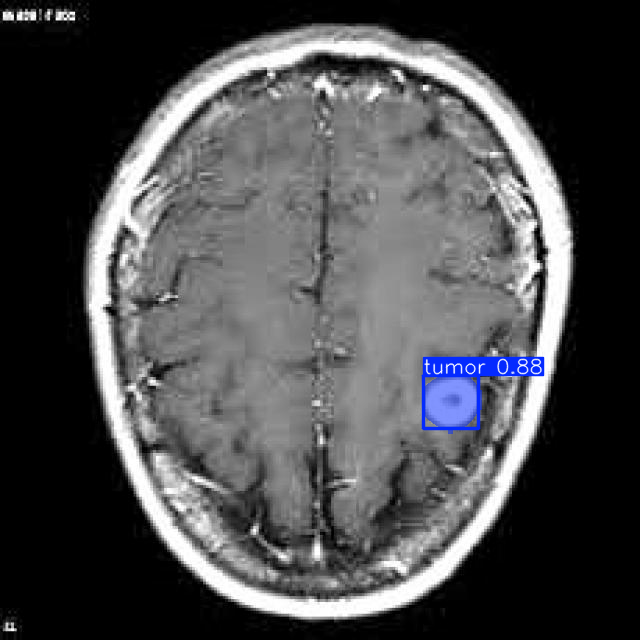

In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.d75ad28b5fae3f14d696dfc98ef3d326.jpg", save=True)
results[0].show()